[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_FXJFrvl7oUVtbtIBT34phNe9lIBZhyB?usp=sharing)

# Working with tabular data

## Titanic dataset download and overview

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
pd.set_option('max_rows', 10000)

### Overview

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

24576/13049 [========================================================] - 0s 0us/step


In [ ]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


About the dataset
- Each row corresponds to a passenger.
- Contains attributes for each passenger - their age, gender, the class they travelled on, how much they paid for their fares, which deck they are on (A-G), which town they got onto the Titanic

## Data preparation and exploratory analysis


### Split the dataframe into train, validation and test

In [ ]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [ ]:
test, val = train_test_split(test, test_size=0.5)

In [ ]:
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

627 train examples
132 validation examples
132 test examples


### Exploratory analysis

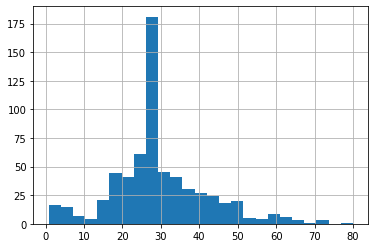

In [ ]:
train.age.hist(bins=25)

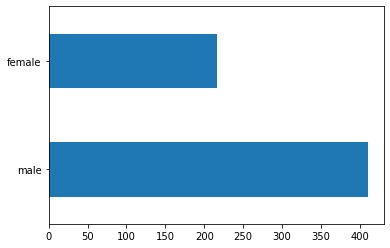

In [ ]:
train.sex.value_counts().plot(kind='barh')

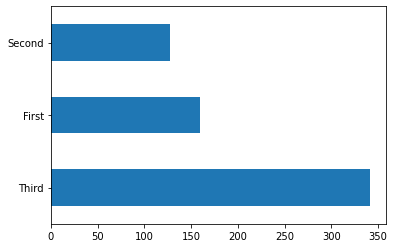

In [ ]:
train['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

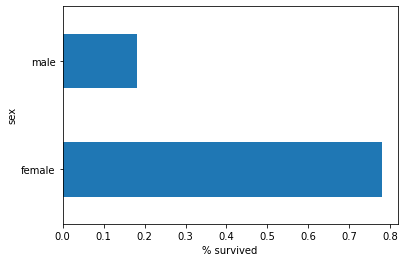

In [ ]:
train.groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

In [ ]:
train[(train.age < 18) & (train['class'] == 'First')]

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
221,1,female,17.0,1,0,108.9000,First,C,Cherbourg,n
315,1,female,14.0,1,2,120.0000,First,B,Southampton,n
395,1,male,17.0,0,2,110.8833,First,C,Cherbourg,n
489,1,female,15.0,0,1,211.3375,First,B,Southampton,n
547,1,female,17.0,1,0,57.0000,First,B,Southampton,n
565,1,male,11.0,1,2,120.0000,First,B,Southampton,n
601,1,female,16.0,0,1,39.4000,First,D,Southampton,n


## Big picture
Compare FashionMNIST with Titanic model

### Model architecture
Fashion MNIST

![Fashion MNIST](https://drive.google.com/uc?id=1agv0HpjsUfb1E4Hgcs_rIldhcV90NiOK)

### model build

In [ ]:
# FashionMNIST
# model = tf.keras.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28, 28)),                           
#  tf.keras.layers.Dense(128, activation='relu'), 
#  tf.keras.layers.Dense(64, activation='relu'),                              
#  tf.keras.layers.Dense(10),                             
#  ])

In [ ]:
# Titanic
# all_features = tf.keras.layers.concatenate(encoded_features)
# x = tf.keras.layers.Dense(128, activation="relu")(all_features)
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# output = tf.keras.layers.Dense(1)(x)

# model = tf.keras.Model(all_inputs, output)

### model - compile

In [ ]:
# FashionMNIST
# model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

In [ ]:
# Titanic
# model.compile(optimizer='adam',
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=["accuracy"])

### Model - fit

In [ ]:
# FashionMNIST
# model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

In [ ]:
# Titanic
# model.fit(train_ds, validation_data=val_ds, epochs=10)

## tf.data API



In [ ]:
help(tf.data.Dataset.from_tensor_slices)

Help on function from_tensor_slices in module tensorflow.python.data.ops.dataset_ops:

from_tensor_slices(tensors, name=None)
    Creates a `Dataset` whose elements are slices of the given tensors.
    
    The given tensors are sliced along their first dimension. This operation
    preserves the structure of the input tensors, removing the first dimension
    of each tensor and using it as the dataset dimension. All input tensors
    must have the same size in their first dimensions.
    
    >>> # Slicing a 1D tensor produces scalar tensor elements.
    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> list(dataset.as_numpy_iterator())
    [1, 2, 3]
    
    >>> # Slicing a 2D tensor produces 1D tensor elements.
    >>> dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
    >>> list(dataset.as_numpy_iterator())
    [array([1, 2], dtype=int32), array([3, 4], dtype=int32)]
    
    >>> # Slicing a tuple of 1D tensors produces tuple elements containing
    

The TensorFlow 2.0 Documentation has more information about [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) and [tf.data.Dataset.from_tensor_slices](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) if you want to find out more.

In [ ]:
dataframe = train.copy()

ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), dataframe.pop('survived')))
for item in ds:
  print(item)

({'survived': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sex': <tf.Tensor: shape=(), dtype=string, numpy=b'male'>, 'age': <tf.Tensor: shape=(), dtype=float64, numpy=22.0>, 'n_siblings_spouses': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'parch': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fare': <tf.Tensor: shape=(), dtype=float64, numpy=7.25>, 'class': <tf.Tensor: shape=(), dtype=string, numpy=b'Third'>, 'deck': <tf.Tensor: shape=(), dtype=string, numpy=b'unknown'>, 'embark_town': <tf.Tensor: shape=(), dtype=string, numpy=b'Southampton'>, 'alone': <tf.Tensor: shape=(), dtype=string, numpy=b'n'>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'survived': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'sex': <tf.Tensor: shape=(), dtype=string, numpy=b'female'>, 'age': <tf.Tensor: shape=(), dtype=float64, numpy=38.0>, 'n_siblings_spouses': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'parch': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fare': <tf.Tensor: shape=(), dtype=float64, 

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=3):
  '''Creates a tf.data dataset from a Pandas Dataframe'''
  dataframe = dataframe.copy()
  labels = dataframe.pop('survived')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  #We'll also want to process this a batch-size at a time, so we can use the batch method.  
  ds = ds.batch(batch_size)
  #Prefetching allows us to optimise fetching of data and training
  ds = ds.prefetch(batch_size)
  return ds

Now that you have created the input pipeline, let's call it to see the format of the data it returns. You have used a small batch size to keep the output readable.

In [ ]:
train_ds = df_to_dataset(train)
train_ds

<PrefetchDataset shapes: ({sex: (None,), age: (None,), n_siblings_spouses: (None,), parch: (None,), fare: (None,), class: (None,), deck: (None,), embark_town: (None,), alone: (None,)}, (None,)), types: ({sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int64, parch: tf.int64, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int64)>

In [ ]:
[(train_features, label_batch)] = train_ds.take(1)
label_batch

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 0])>

- You can see that we have a batch of 3 passengers.

In [ ]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['age'])
print('A batch of labels:', label_batch )

Every feature: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']
A batch of ages: tf.Tensor([21. 24. 27.], shape=(3,), dtype=float64)
A batch of labels: tf.Tensor([1 1 1], shape=(3,), dtype=int64)


## Feature engineering

### Numeric columns


In [ ]:
train.describe()


,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


Let's create a function `get_normalization_layer` that returns a layer which applies featurewise normalization to numerical features.

In [ ]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = preprocessing.Normalization(axis=None)

  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # A pre-processing / non-traininable layer. 
  normalizer.adapt(feature_ds)

  return normalizer

The TensorFlow 2.0 Documentation has more information on the [adapt method](https://www.tensorflow.org/guide/keras/preprocessing_layers#the_adapt_method) if you want to find out more.

In [ ]:
age_column = train_features['age']
age_column

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([21., 24., 27.])>

- You can see that when we pass a batch of 3 numerical ages to the get_normalization_layer, they are returned as normalized features.

In [ ]:
numeric_layer = get_normalization_layer('age', train_ds)
numeric_layer(age_column)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.6904031 , -0.45043844, -0.21047378], dtype=float32)>

### Categorical columns


In this dataset, the town that passengers embarked is represented as a string (e.g. 'Southampton', 'Cherbourg', 'Queenstown' or 'unknown'). You cannot feed strings directly to a model. The preprocessing layer takes care of representing strings as a one-hot encoding vector.

In [ ]:
train.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

`get_category_encoding_layer` function returns a layer which maps values from a vocabulary to integer indices and one-hot encodes the features.

In [ ]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a StringLookup layer which will turn strings into integer indices
  if dtype == 'string':
    index = preprocessing.StringLookup(max_tokens=max_tokens)
  else:
    index = preprocessing.IntegerLookup(max_tokens=max_tokens)

  # Prepare a Dataset that only yields our feature
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Create a Discretization for our integer indices.
  encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to our indices and return this feature
  return lambda feature: encoder(index(feature))

The TensorFlow 2.0 Documentation has more details on [StringLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup), [IntegerLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/IntegerLookup) and [CategoryEncoding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding)

In [ ]:
index = preprocessing.StringLookup(max_tokens=None)
feature_ds = train_ds.map(lambda x, y: x['embark_town'])
index.adapt(feature_ds)

print(f'vocabulary: {index.get_vocabulary()}')
print(f'vocabulary size: {index.vocabulary_size()}')

vocabulary: ['[UNK]', 'Southampton', 'Cherbourg', 'Queenstown', 'unknown']
vocabulary size: 5


In [ ]:
index.oov_token

'[UNK]'

Let's take a look at a batch of 3 entries. 

In [ ]:
embark_town_column = train_features['embark_town']
embark_town_column

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Southampton', b'Southampton', b'Southampton'], dtype=object)>

In [ ]:
categorical_layer = get_category_encoding_layer('embark_town', train_ds, 'string')
categorical_layer(embark_town_column)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 0.], dtype=float32)>

### Creating a pipeline

In [ ]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

- Next let's take a look at our numeric and categorical features

In [ ]:
all_inputs = []
encoded_features = []

# Numeric features.
numeric_columns = ['age', 'n_siblings_spouses', 'parch', 'fare']
for column_name in numeric_columns:
  numeric_column = tf.keras.Input(shape=(1,), name=column_name)
  normalization_layer = get_normalization_layer(column_name, train_ds)
  encoded_numeric_column = normalization_layer(numeric_column)
  all_inputs.append(numeric_column)
  encoded_features.append(encoded_numeric_column)

# Categorical features encoded as string.
categorical_columns = ['sex', 'class', 'embark_town', 'deck', 'alone']
for column_name in categorical_columns:
  categorical_column = tf.keras.Input(shape=(1,), name=column_name, dtype='string')
  encoding_layer = get_category_encoding_layer(column_name, train_ds, dtype='string', max_tokens=5)
  encoded_categorical_column = encoding_layer(categorical_column)
  all_inputs.append(categorical_column)
  encoded_features.append(encoded_categorical_column)

Let's take a look at the list all_inputs to see what we have. You can see these are the different columns

In [ ]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>]

The encoded_features is all of the layers that have been normalized for numeric values and have category encoding for categorical values

In [ ]:
encoded_features

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_4')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_4')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_5')>]

## Train and evaluate the model

### Create and compile model

In [ ]:
#compile
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(128, activation="relu")(all_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

Fashion MNIST neural network model
![Fashion MNIST](https://drive.google.com/uc?id=1agv0HpjsUfb1E4Hgcs_rIldhcV90NiOK)

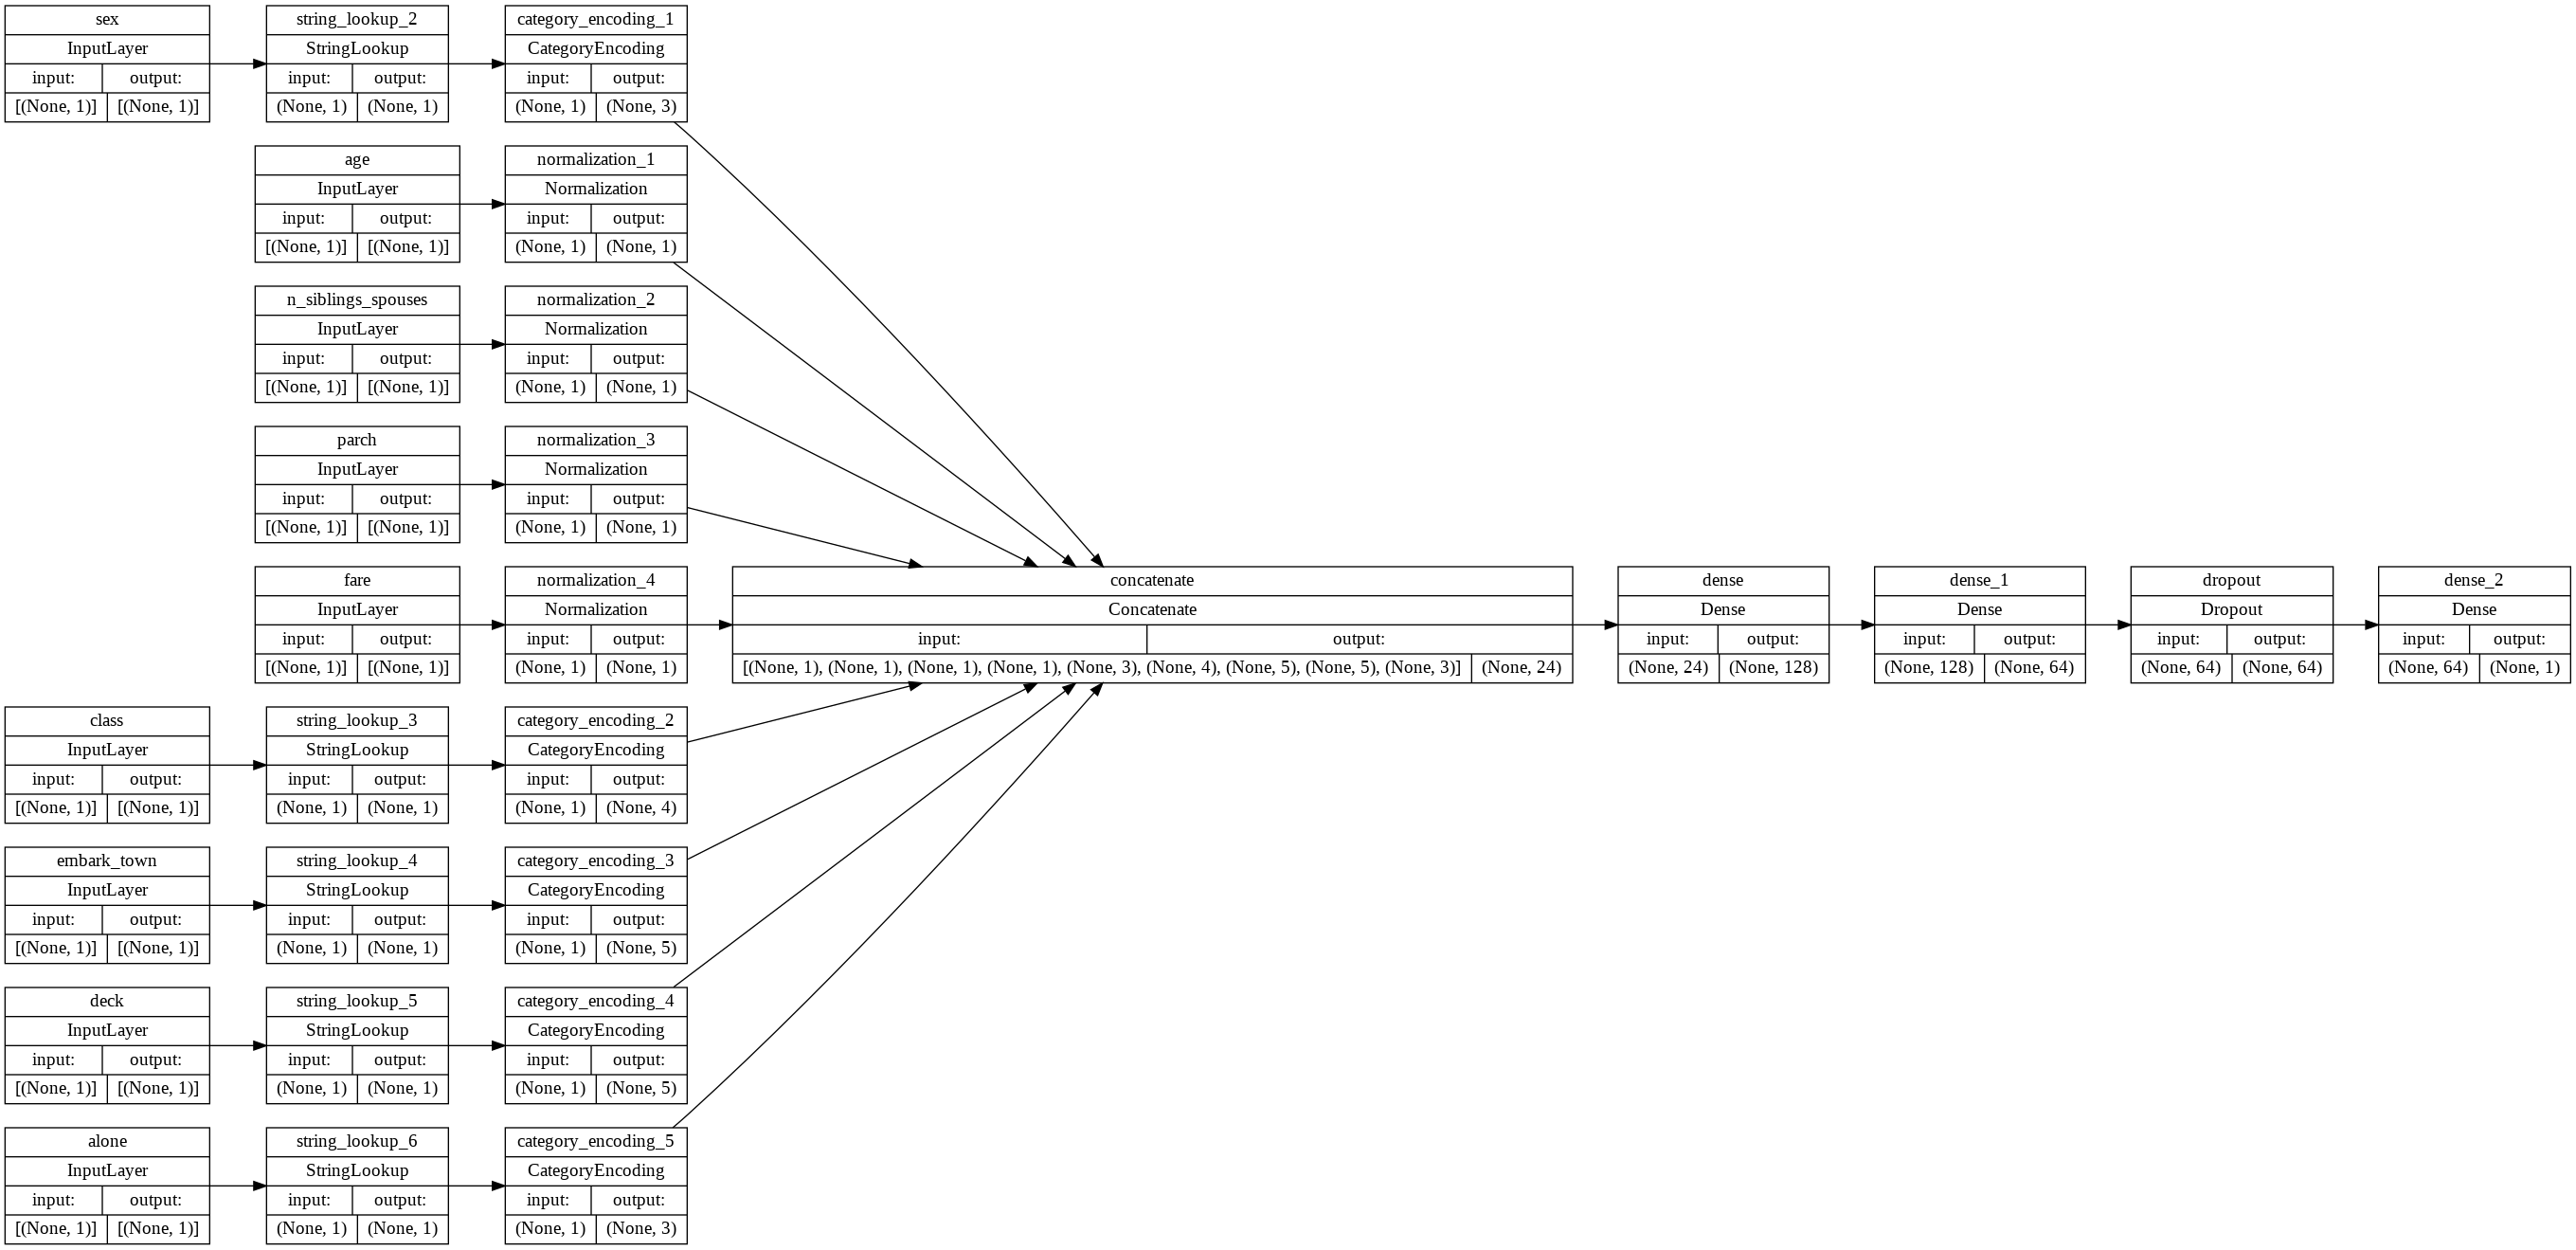

In [ ]:
# rankdir='LR' is used to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

### Train and evaluate model

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 41ms/step - loss: 0.6185 - accuracy: 0.6204 - val_loss: 0.5784 - val_accuracy: 0.6288
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.6778 - val_loss: 0.5317 - val_accuracy: 0.6970
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7496 - val_loss: 0.5009 - val_accuracy: 0.7348
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.4402 - accuracy: 0.7974 - val_loss: 0.4910 - val_accuracy: 0.7576
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4174 - accuracy: 0.8166 - val_loss: 0.4925 - val_accuracy: 0.7576
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8198 - val_loss: 0.4885 - val_accuracy: 0.7727
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8246 - val_loss: 0.4846 - val_accuracy: 0.7803
Epoch 8/10
10/10 [=

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.8409
Accuracy 0.8409090638160706


In [ ]:
model.save('classifier')

INFO:tensorflow:Assets written to: classifier/assets


In [ ]:
!ls -l 

total 192
drwxr-xr-x 4 root root   4096 Nov 10 10:59 classifier
-rw-r--r-- 1 root root 187031 Nov 10 10:59 model.png
drwxr-xr-x 1 root root   4096 Nov  1 13:35 sample_data
